## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [4]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import NullLocator
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
#%matplotlib inline
%matplotlib notebook

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0
print ("Настройки визуализации проведены успешно!")

3.5.2
0.11.2
Настройки визуализации проведены успешно!


<IPython.core.display.Javascript object>


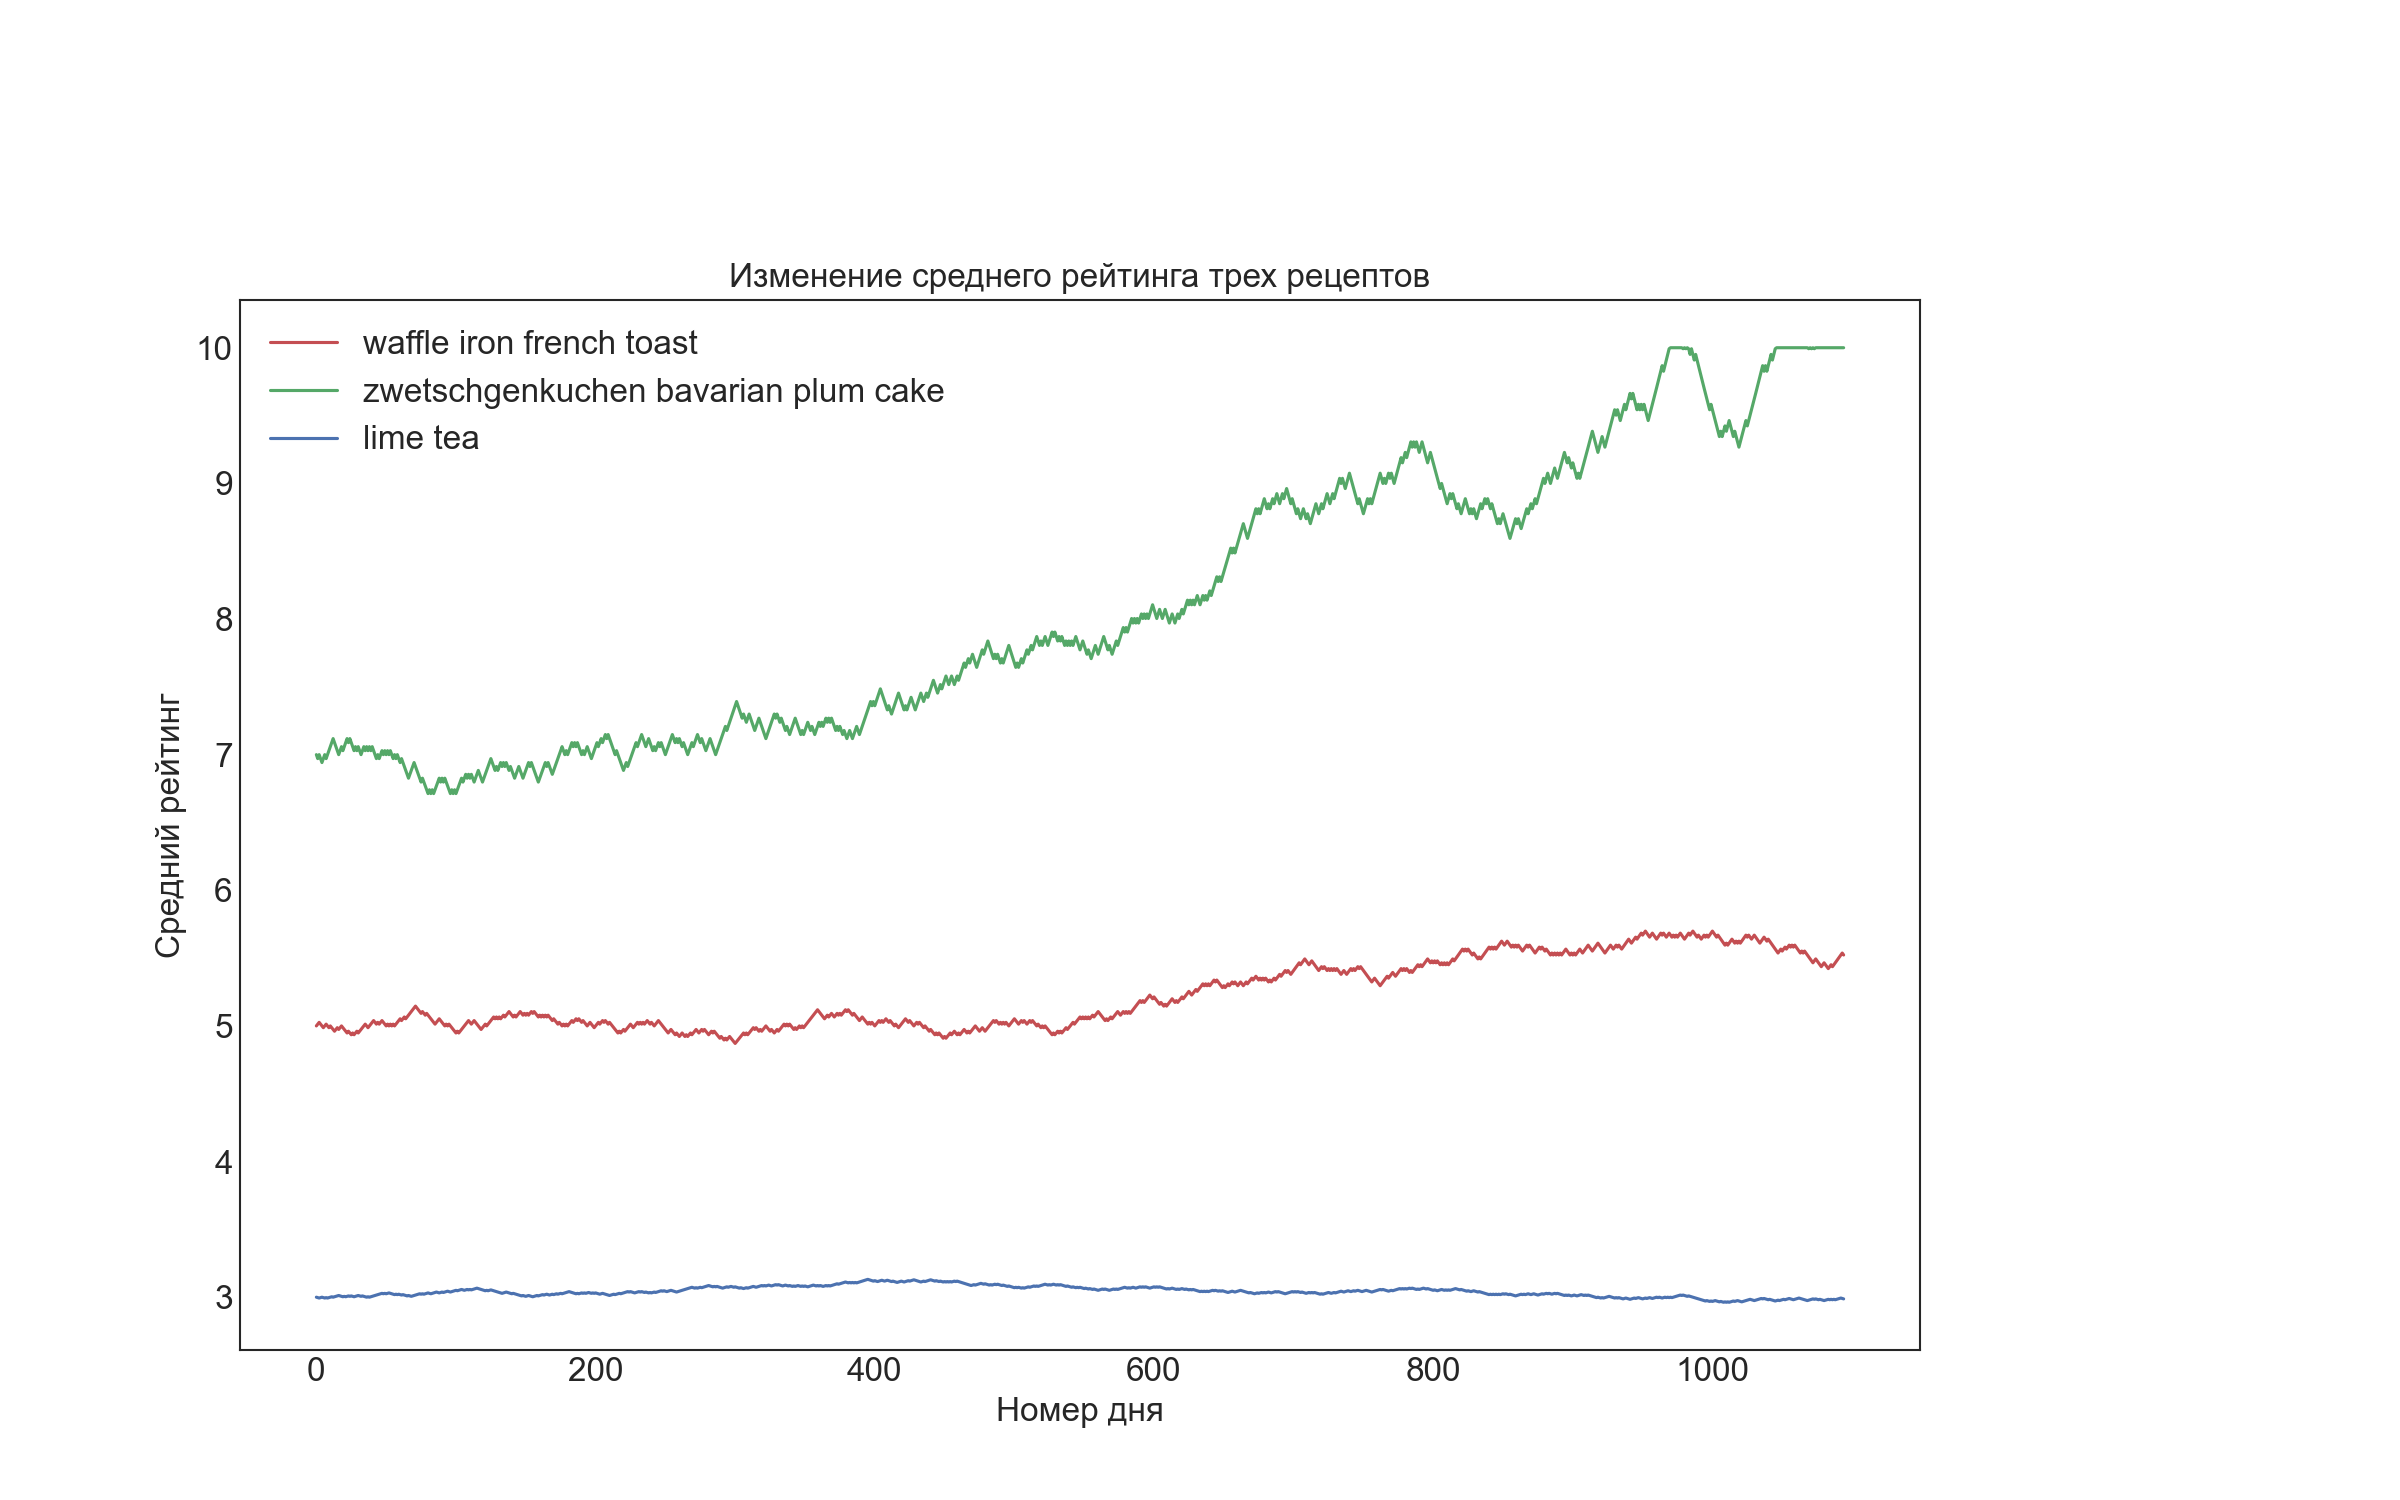

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

In [5]:
import os
cwd = os.getcwd()
data = np.load(cwd+'\\data\\average_ratings.npy')
%matplotlib notebook
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
line1, = ax.plot(data[0], 'r', label='waffle iron french toast')
line2, = ax.plot(data[1], 'g', label='zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(data[2], 'b', label='lime tea')
ax.legend(handles=[line1, line2, line3], loc='best')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\den10\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


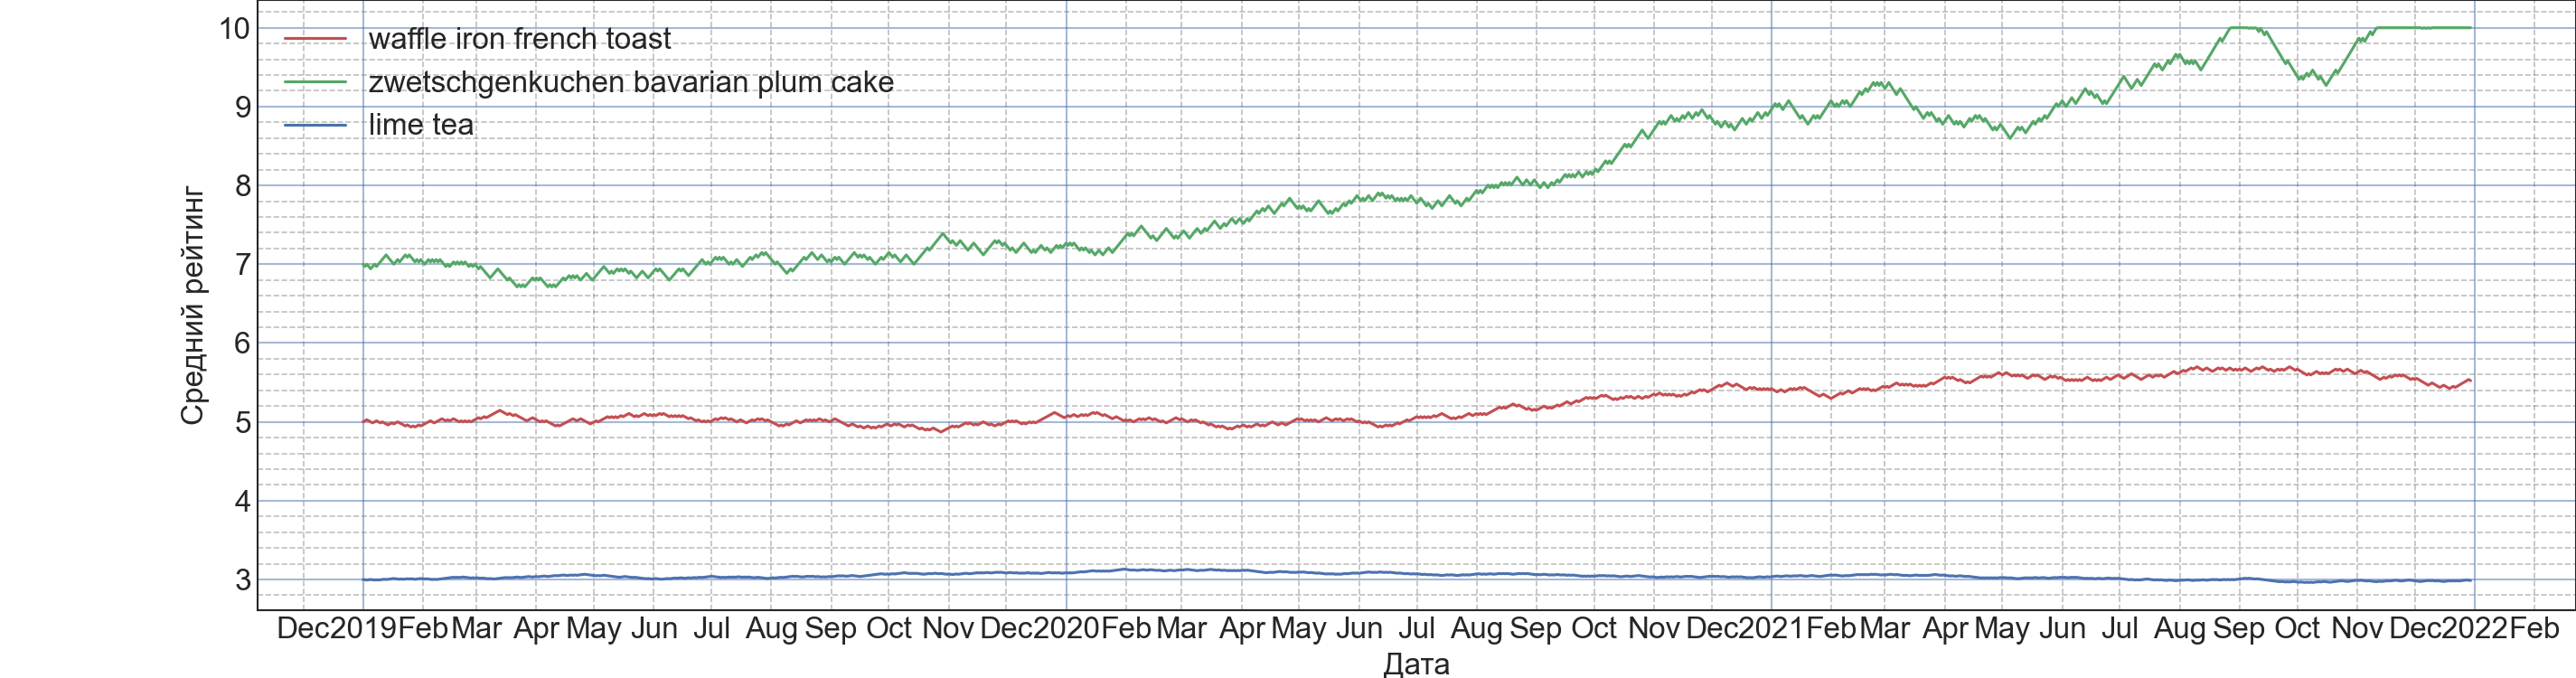

In [6]:
date_diapason=pd.date_range(start='1/1/2019', end='30/12/2021', freq='1D')
fig = plt.figure(figsize=(19, 5))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
# настроенная визуализация сетки:
plt.plot(date_diapason, data[0], 'r')
plt.plot(date_diapason, data[1], 'g')
plt.plot(date_diapason, data[2], 'b')
# включение дополнительных рисок:
xfmt = mdates.DateFormatter('%Y')
xfmt1 = mdates.DateFormatter('%b')
ax.minorticks_on()
ax.grid(which='major', color='b', alpha=0.5, linestyle='solid', linewidth=1)
ax.grid(which='minor', color='grey', alpha=0.5, linestyle='dashed', linewidth=0.8)
ax.legend(handles=[line1, line2, line3], loc='best')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
#ax.grid(True)
#ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_minor_formatter(xfmt1)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
#plt.grid() # сетка по умолчанию


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

<IPython.core.display.Javascript object>


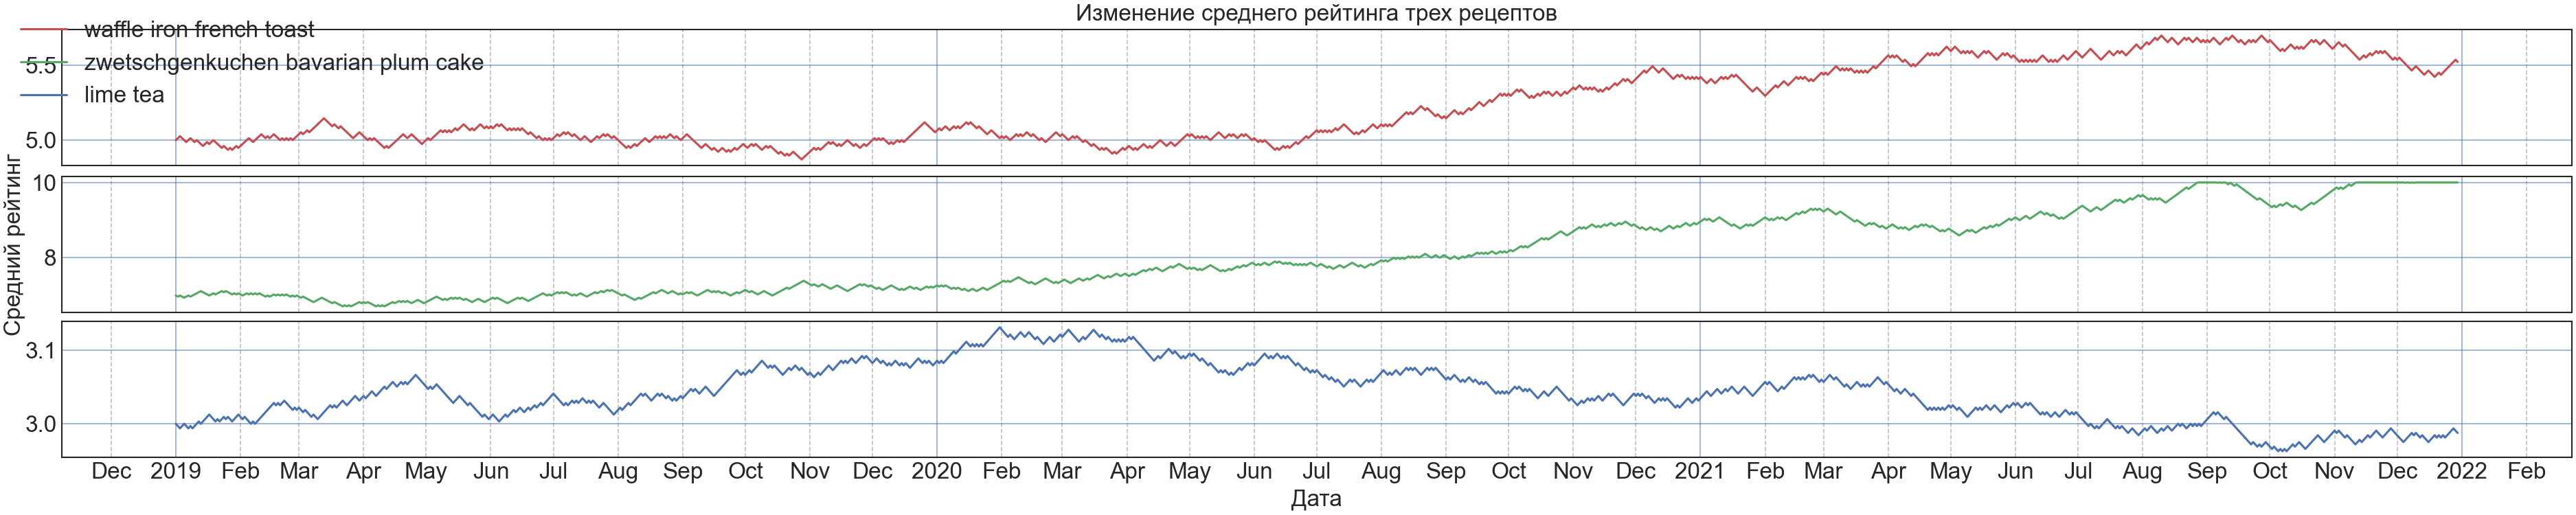

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

In [7]:
cwd = os.getcwd()
data = cbook.get_sample_data(cwd+'\\data\\average_ratings.npy', np_load=True)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(25, 5), layout="constrained", sharex='col')


ax0.plot(date_diapason, data[0], 'r', label='waffle iron french toast')
ax1.plot(date_diapason, data[1], 'g', label='zwetschgenkuchen bavarian plum cake')
ax2.plot(date_diapason, data[2], 'b', label='lime tea')
for ax in fig.axes:
    ax.grid(which='minor', color='grey', alpha=0.5, linestyle='dashed', linewidth=0.8)
    ax.grid(which='major', color='b', alpha=0.5, linestyle='solid', linewidth=1)
    
    ax.xaxis.set_minor_formatter(xfmt1)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

fig.legend(handles=[line1, line2, line3], loc='upper left')
fig.axes[-1].set_xlabel('Дата')
fig.axes[1].set_ylabel('Средний рейтинг')
fig.axes[0].set_title('Изменение среднего рейтинга трех рецептов')




4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


<IPython.core.display.Javascript object>


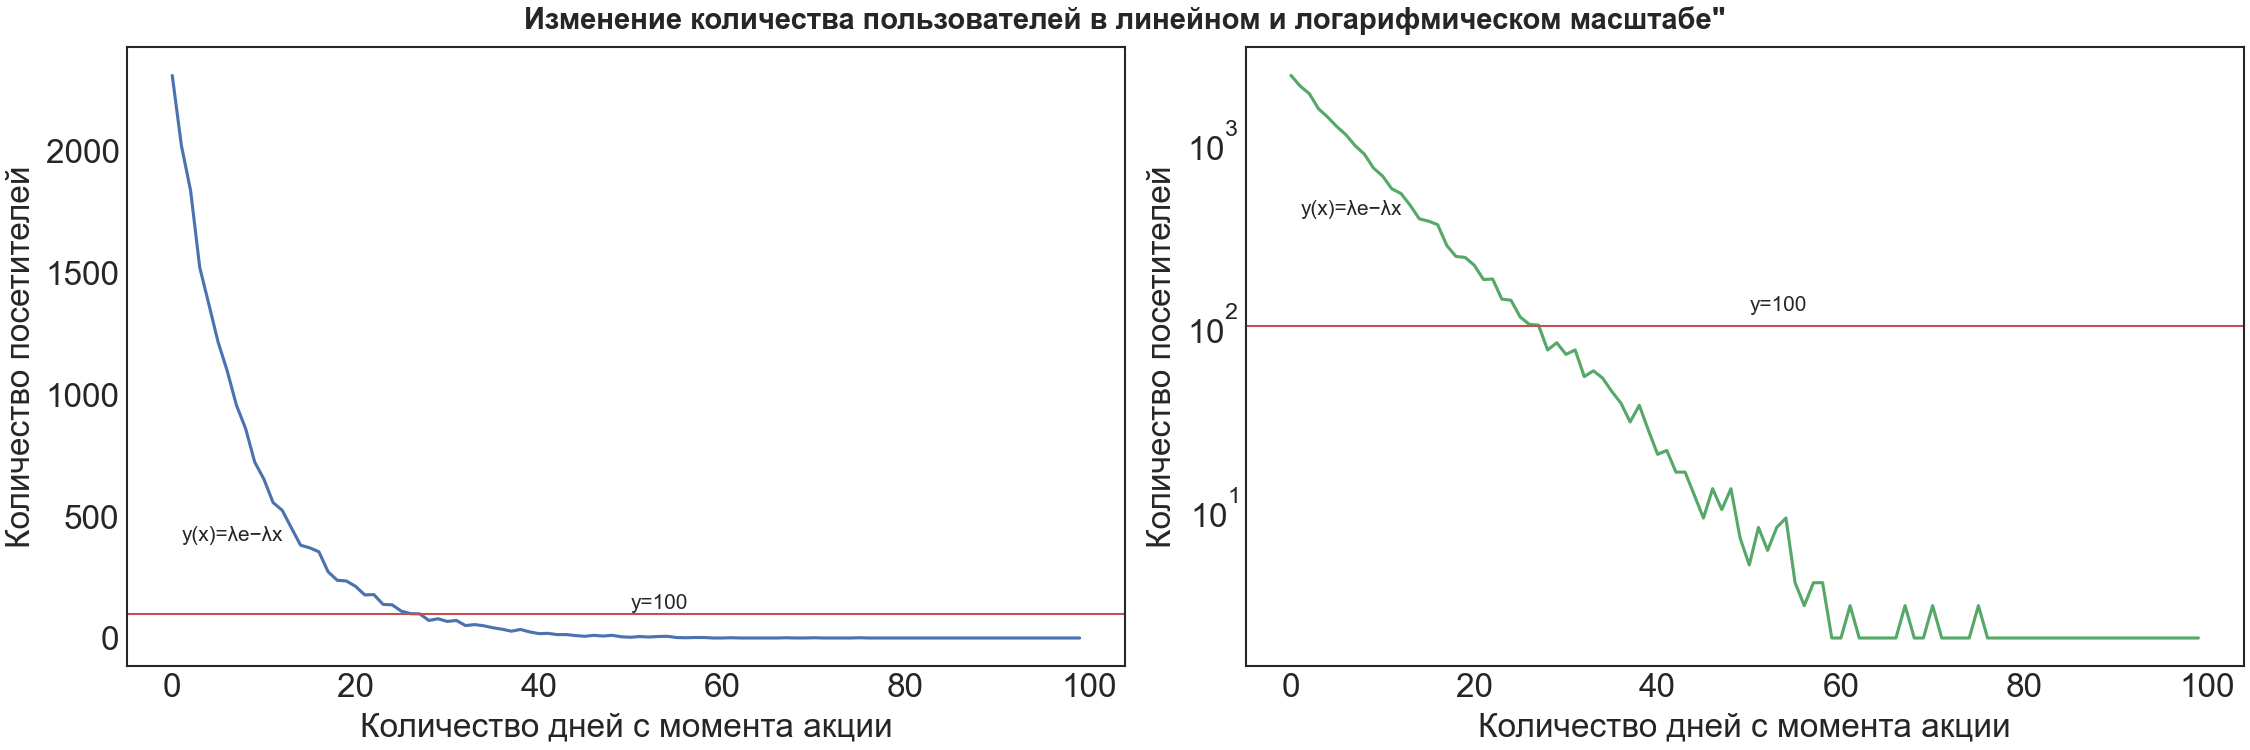

In [8]:
cwd = os.getcwd()
data2 = cbook.get_sample_data(cwd+'\\data\\visitors.npy', np_load=True)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), layout="constrained") #sharey='row')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе"', fontsize=14, fontweight='bold')
ax0.plot(data2, 'b', label='waffle iron french toast')
ax1.plot(data2, 'g', label='zwetschgenkuchen bavarian plum cake')
ax1.set_yscale("log")
for ax in fig.axes:
    ax.axhline(y=100, linewidth=1, color='r')
    ax.set_xlabel('Количество дней с момента акции')
    ax.set_ylabel('Количество посетителей')
    #ax.annotate('y(x)=λe−λx', xy=(2, 1), xytext=(3, 4))
    ax.text(1, 400, 'y(x)=λe−λx', fontsize=10)
    ax.text(50, 120, 'y=100', fontsize=10)



## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
import numpy as np
import pandas as pd
cwd = os.getcwd()
#data2 = cbook.get_sample_data(cwd+'\\data\\visitors.npy', np_load=True)
recipes=pd.read_csv(cwd+'\\data\\recipes_sample.csv', encoding='ISO-8859–1', parse_dates= ['submitted'])
reviews=pd.read_csv(cwd+'\\data\\reviews_sample.csv', delimiter=',', encoding='ISO-8859–1', parse_dates= ['date'])
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

<IPython.core.display.Javascript object>


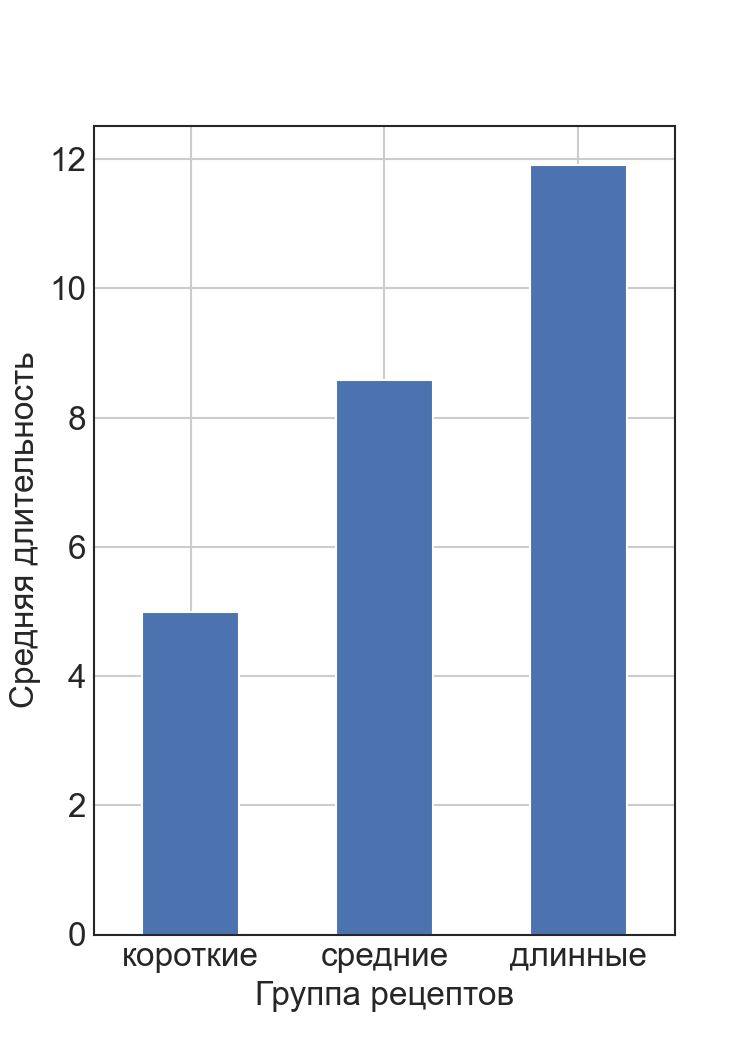

<IPython.core.display.Javascript object>


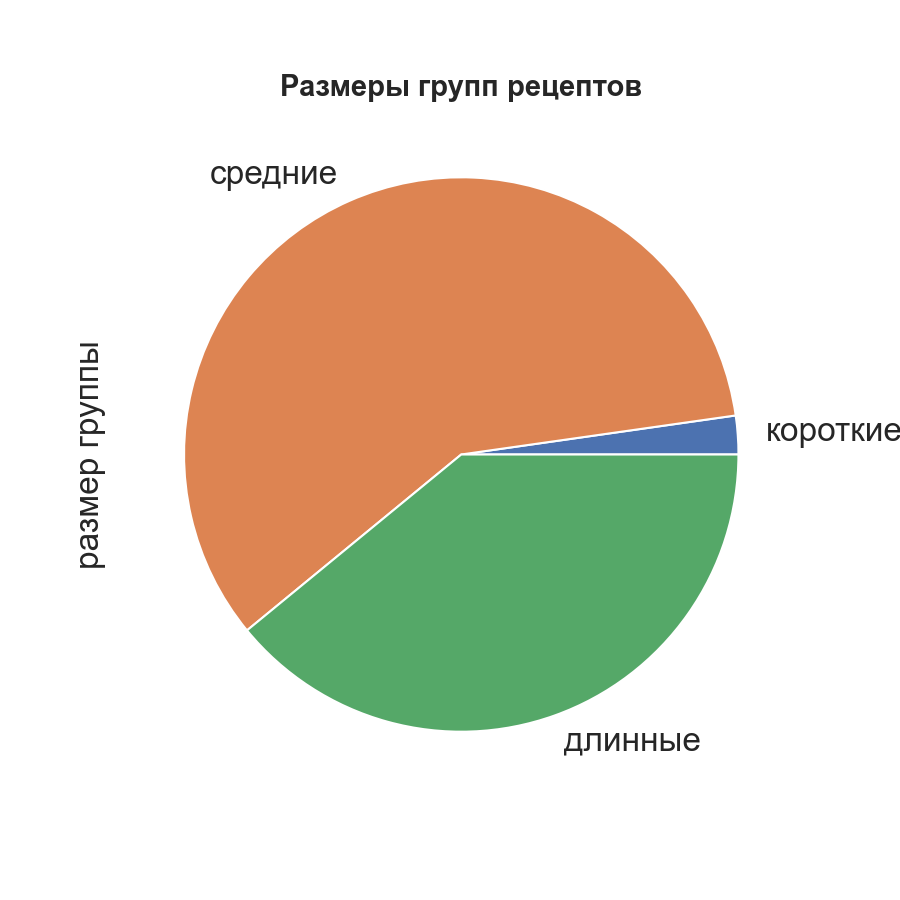

Text(0.5, 1.0, 'Размеры групп рецептов')

In [10]:
gb1_1 = recipes.groupby(recipes['minutes']<5)['id'].count()
gb1_2 = recipes.groupby(recipes['minutes']<5)['n_steps'].mean()
gb2_1 = recipes.groupby((5<=recipes['minutes'])&(recipes['minutes']<50))['id'].count()
gb2_2 = recipes.groupby((5<=recipes['minutes'])&(recipes['minutes']<50))['n_steps'].mean()
gb3_1 = recipes.groupby(recipes['minutes']>=50)['id'].count()
gb3_2 = recipes.groupby(recipes['minutes']>=50)['n_steps'].mean()

d = {'размер группы': [gb1_1[1], gb2_1[1],gb3_1[1]], 'среднее количество шагов': [gb1_2[1],gb2_2[1],gb3_2[1]]}
index = ["короткие", "средние", "длинные"]
df = pd.DataFrame(data=d, index=index)
#names =df.index
#values = df.values
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), layout="constrained")
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), layout="constrained")

fig1= df.plot.bar(y='среднее количество шагов',rot=0, figsize=(5, 7), legend= False, grid=True)
fig2 = df.plot.pie(y='размер группы', figsize=(6, 6), legend= False)
fig1.set_xlabel('Группа рецептов')
fig1.set_ylabel('Средняя длительность')
fig2.set_title('Размеры групп рецептов', fontsize=14, fontweight='bold')
#axes[0]=df['размер группы'].plot.pie(subplots=True)
#df = recipes.groupby('minutes').count()
#print (gb1_1[1],gb2_1[1],gb3_1[1])
#print (gb1_2[1],gb2_2[1],gb3_2[1])

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

C:\Users\den10\AppData\Local\Temp\ipykernel_33712\2116615412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['date'].dt.year ==2008, 'date'] = 2008


<IPython.core.display.Javascript object>


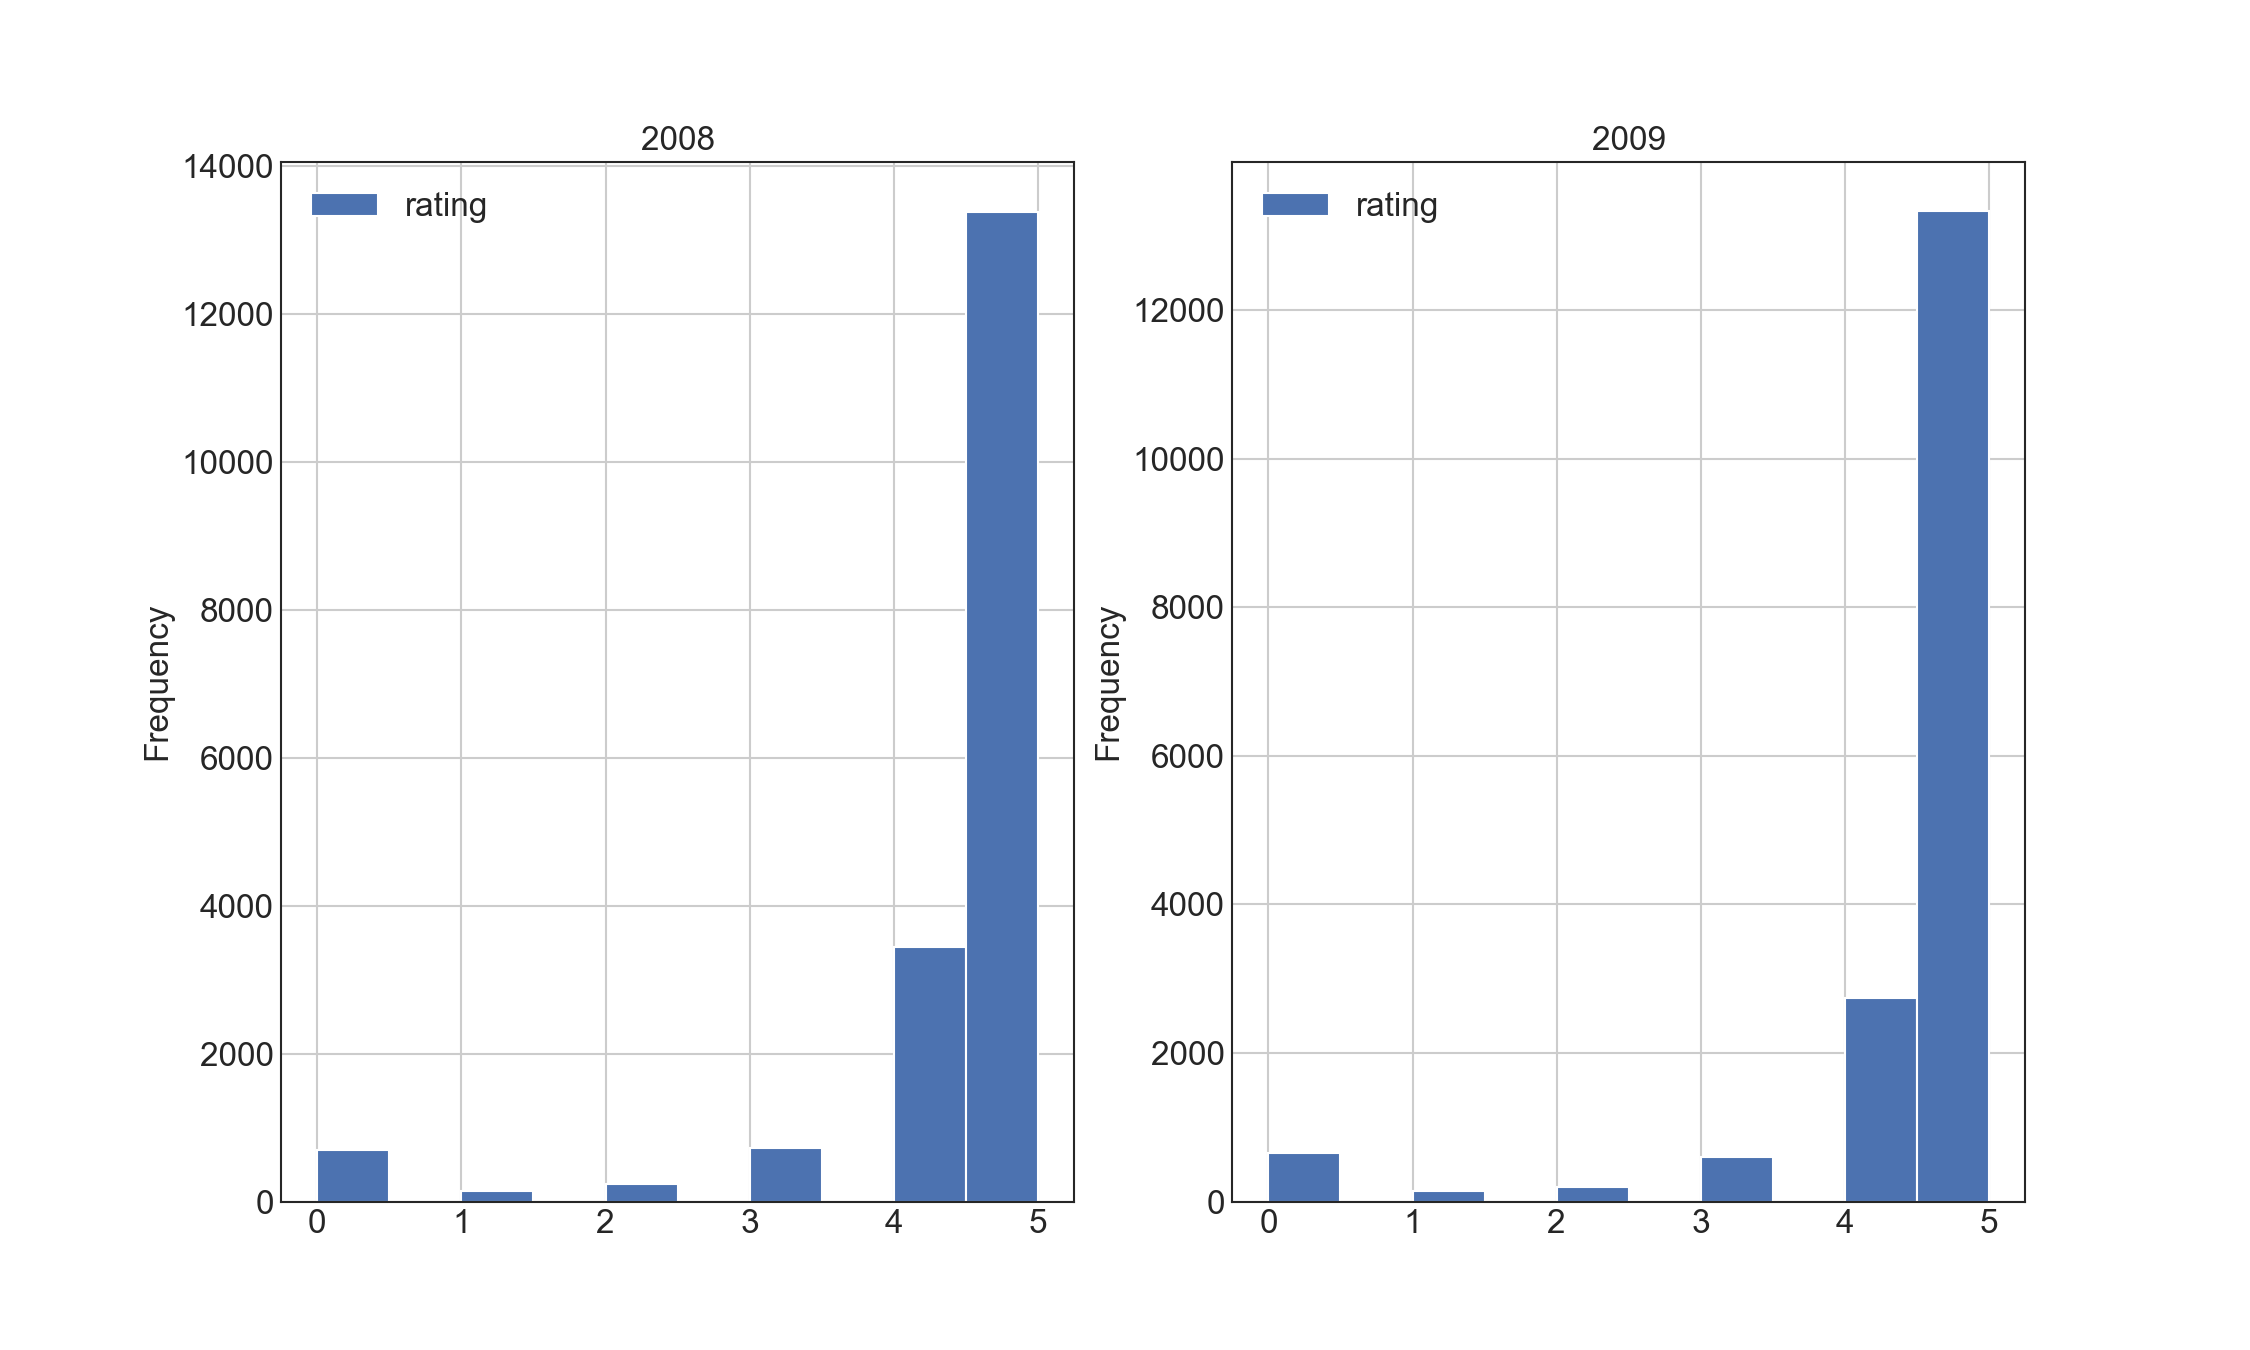

In [11]:
#df1=reviews.filter((items['submitted'].dt.year=2008iews)|(reviews['submitted'].dt.year=2009))
#newRecipes= recipes[recipes['submitted'].dt.year>=2010]
#df1= reviews[(reviews['date'].dt.year<=2009) & (reviews['date'].dt.year>=2008)]
df1= reviews[(reviews['date'].dt.year==2008)]
df2= reviews[(reviews['date'].dt.year==2009)]
df1.loc[df1['date'].dt.year ==2008, 'date'] = 2008
df2.loc[df2['date'].dt.year ==2009, 'date'] = 2009
df=pd.concat([df1, df2], ignore_index=True, sort=False)
#df2= reviews[(reviews['date'].dt.year<=2009)]
ax0 = df.plot.hist(column=["rating"], by="date", figsize=(15, 9), layout= (1,2), grid = True)
#df2.info()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

C:\Users\den10\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\den10\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<IPython.core.display.Javascript object>


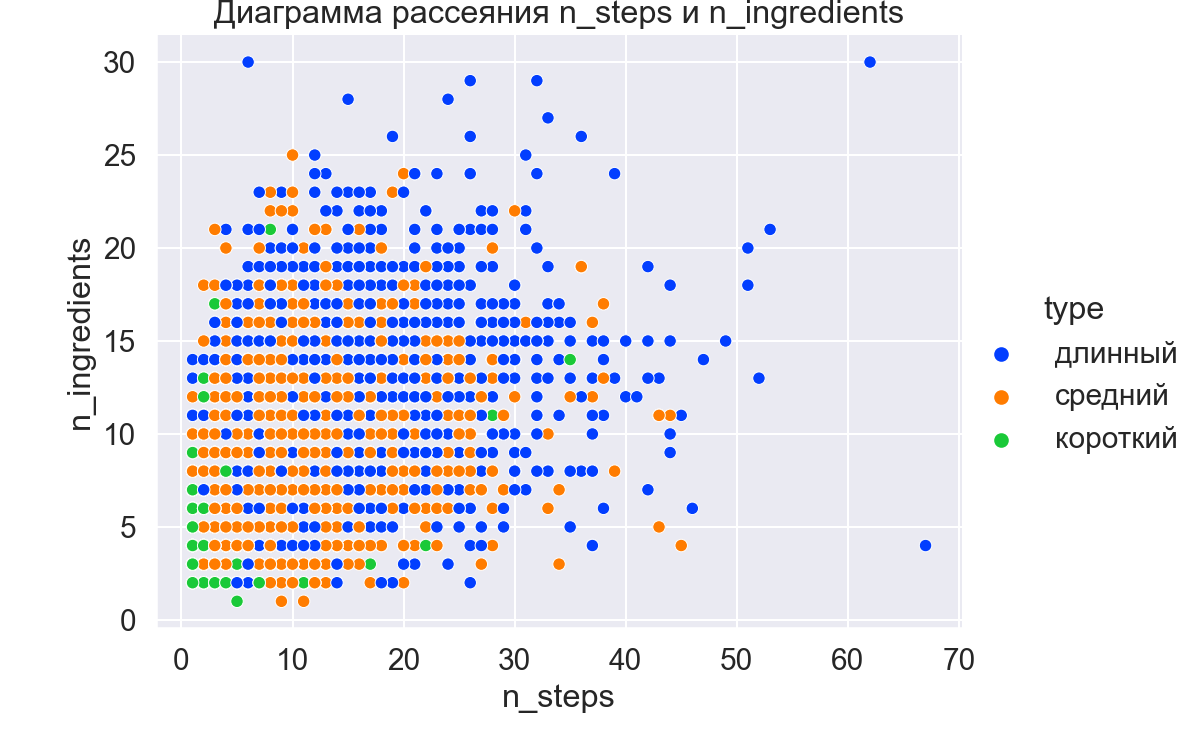

C:\Users\den10\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


In [12]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
recipes['type']= 'короткий'
recipes.loc[recipes['minutes']>5, 'type'] = "средний"
recipes.loc[recipes['minutes']>=50, 'type'] = "длинный"
#df2.loc[df2['date'].dt.year ==2009, 'date'] = 2009
sns.relplot(
    x='n_steps', 
    y='n_ingredients', 
    data=recipes,
    palette='bright',
    height=5, aspect=1.3,
    kind='scatter', 
    hue='type'
        ).set(title='Диаграмма рассеяния n_steps и n_ingredients')

Визуально линейная зависимость между переменными  'n_steps' и 'n_ingredients' ОТСУТСТВУЕТ.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

C:\Users\den10\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\den10\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<IPython.core.display.Javascript object>


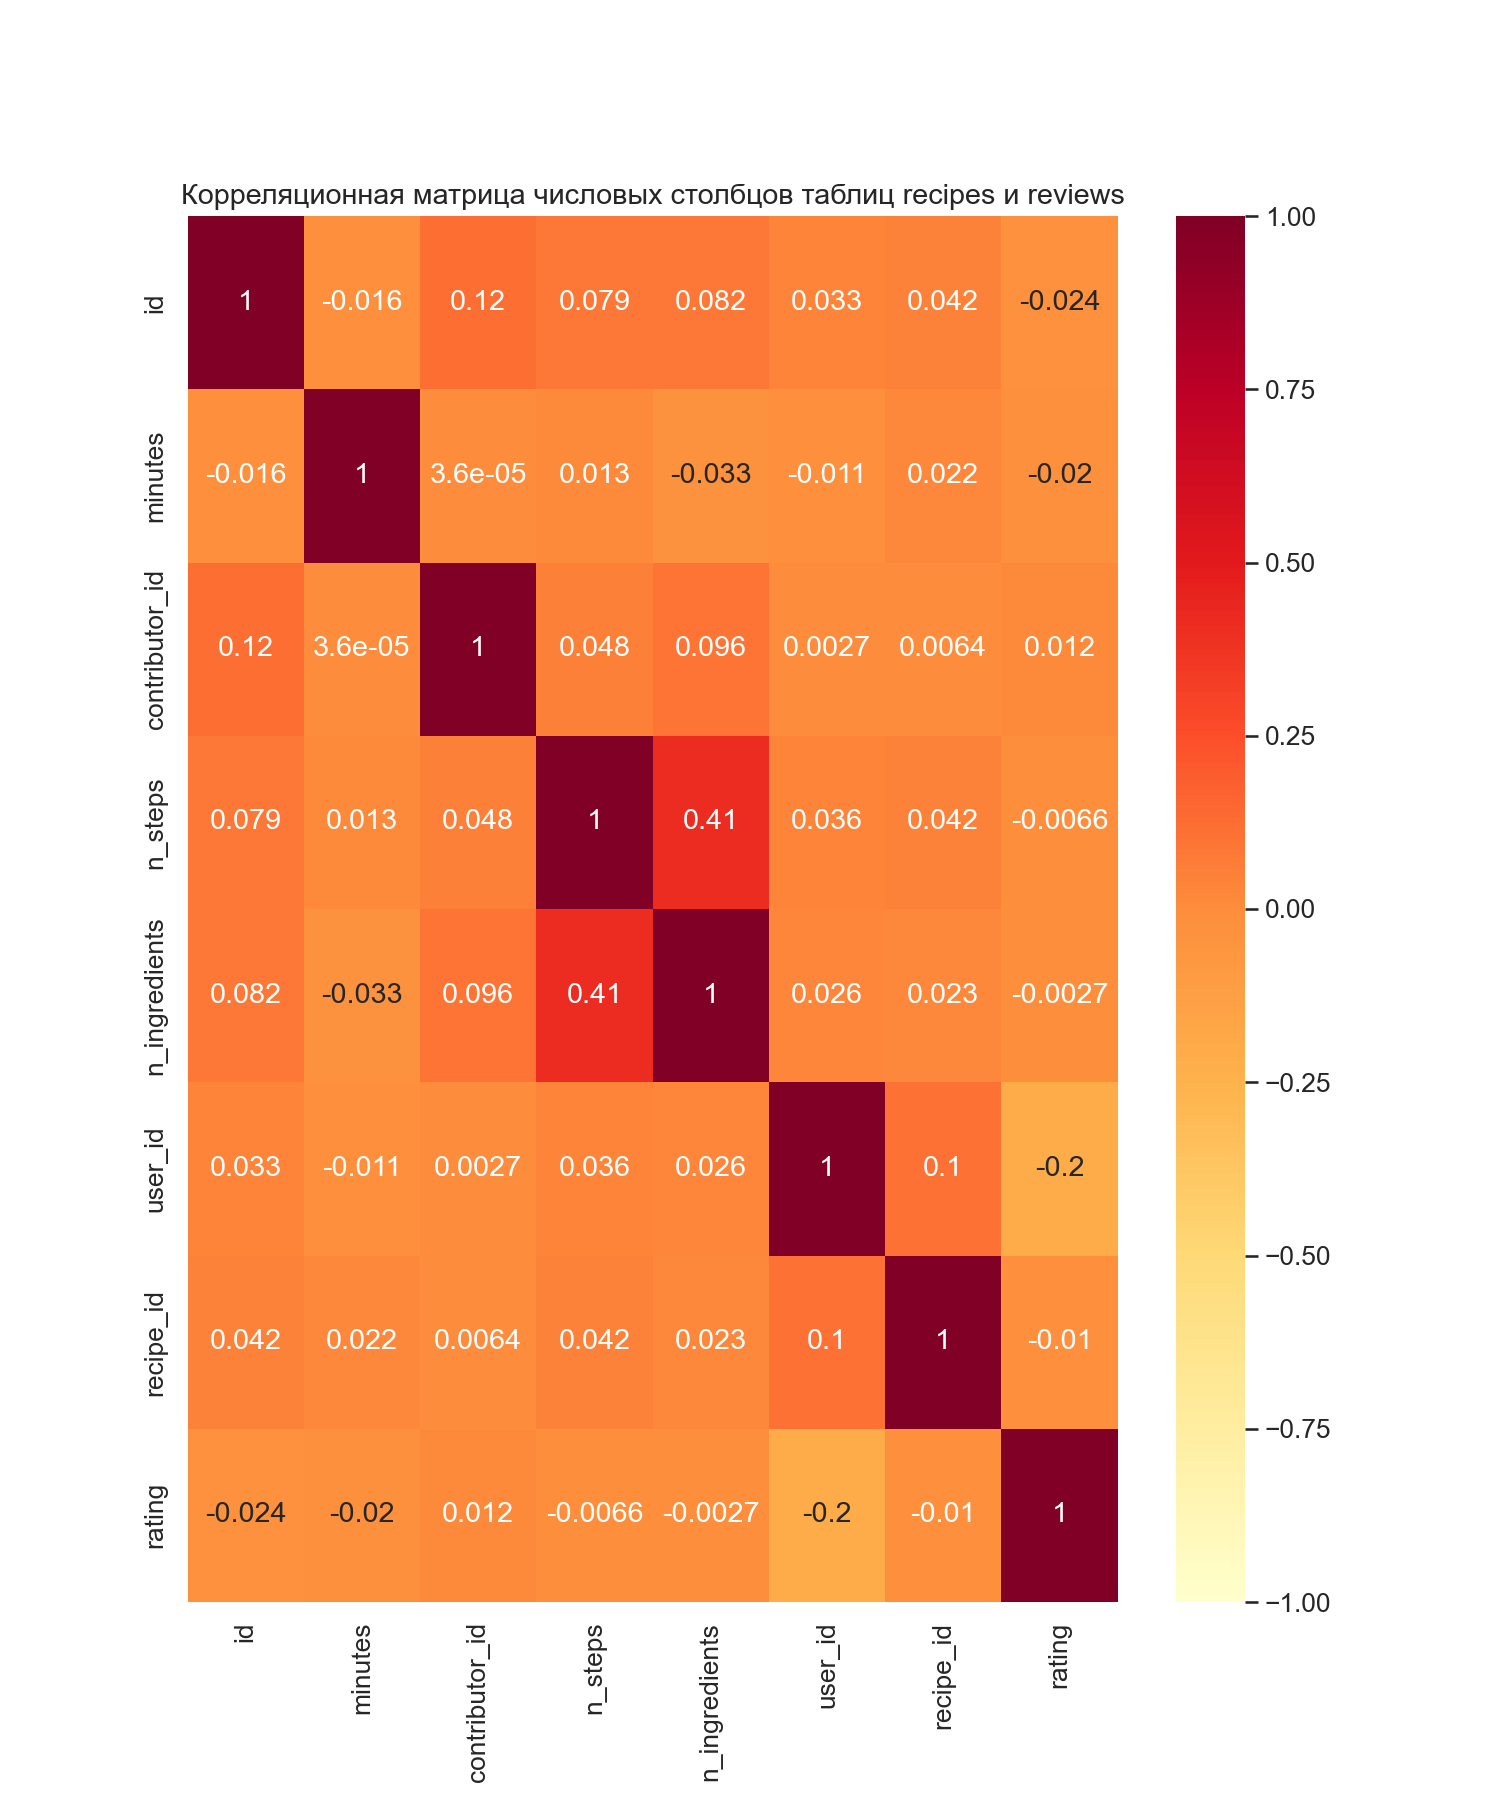

[Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')]

In [13]:
merged_table= pd.merge(recipes, reviews, left_on= "id", right_on = 'Unnamed: 0', how = 'right')
merged_table.drop(['Unnamed: 0'], axis=1, inplace=True)
sns.set(font_scale=1.15)
plt.figure(figsize=(10,12))
sns.heatmap(
    merged_table.corr(),        
    cmap='YlOrRd', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица числовых столбцов таблиц recipes и reviews')